In [4]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [5]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
data.shape

(213, 11)

In [4]:
data.isna().sum() # there are no null values 

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [30]:
df1 = data.rename(columns={'1': 'ID', '1.52101': 'RI', '13.64': 'Na', '4.49': 'Mg', '1.10': 'Al', '71.78': 'Si', '0.06': 'K', '8.75': 'Ca', '0.00': 'Ba', '0.00.1': 'Fe', '1.1': 'Glass' })


In [31]:
df1

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [32]:
df1.drop(['ID'],axis=1,inplace=True)

In [33]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [34]:
cor = df1.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Glass,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


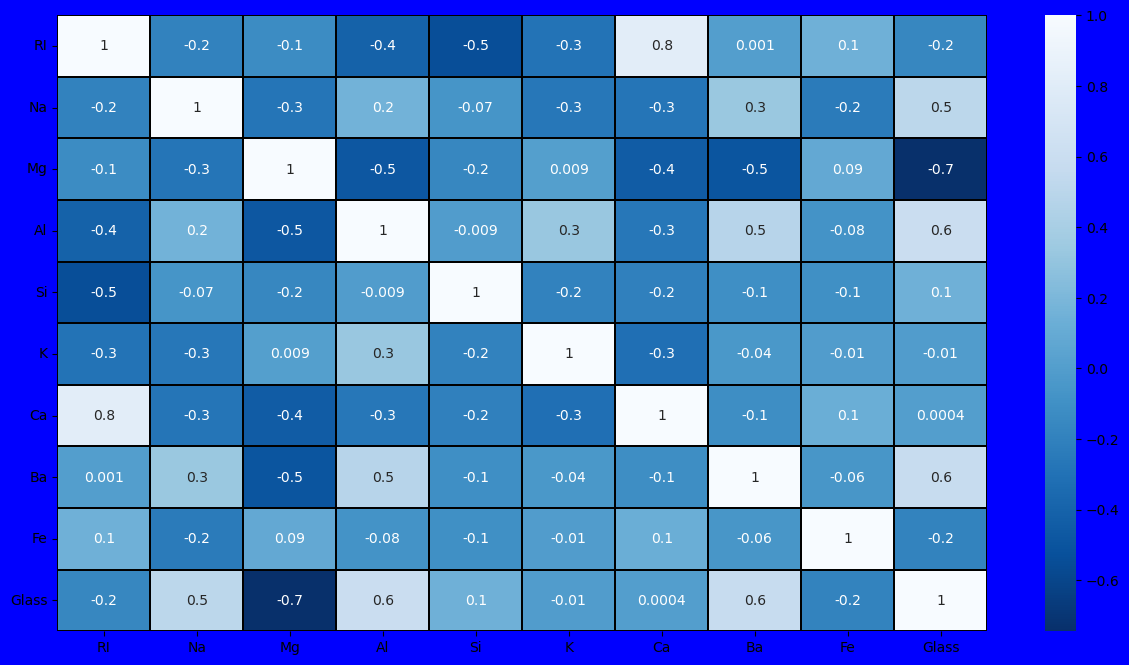

In [35]:
plt.figure(figsize=(15,8), facecolor='blue')
sns.heatmap(df1.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

from the above heatmap we can observe that there is no multicollinearity issue observed so we will not drop the column

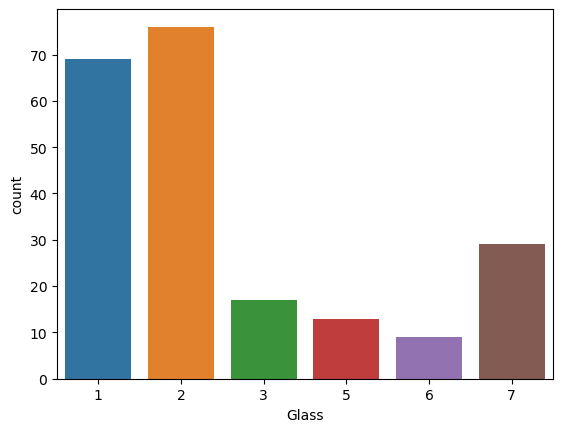

In [36]:
sns.countplot(x='Glass',data=df1)
plt.show()

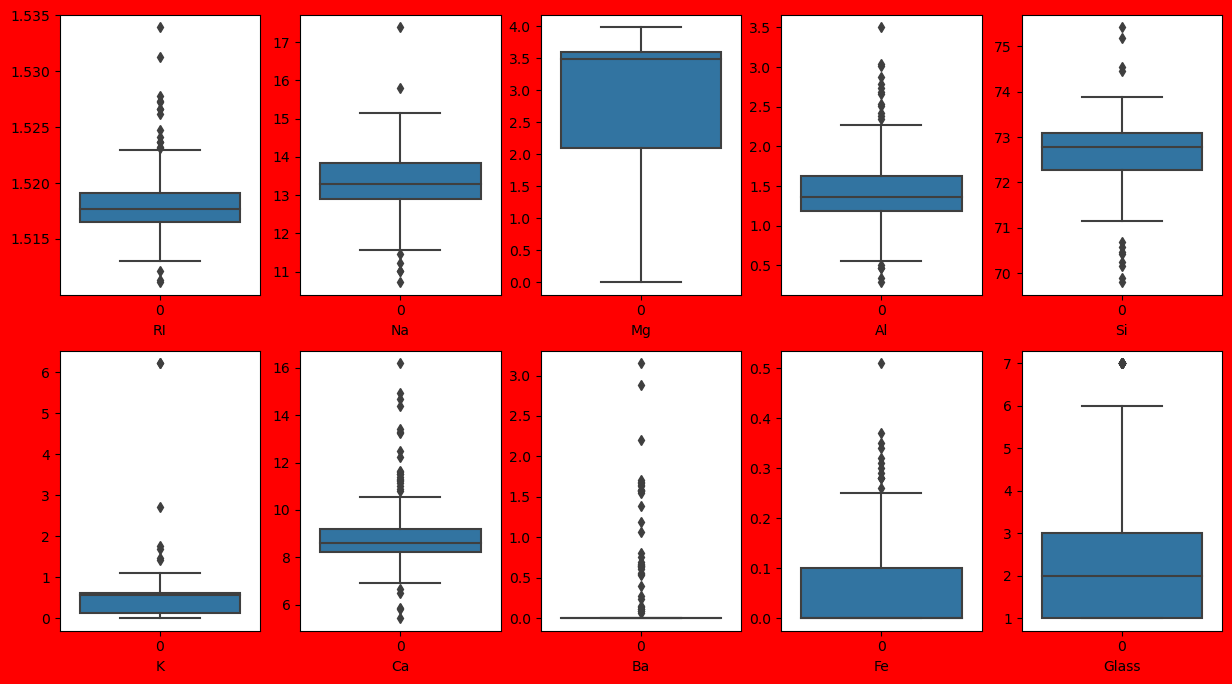

In [37]:
plt.figure(figsize=(15,8), facecolor='red')
plotnumber = 1

for column in df1:
    if plotnumber<=12:
        ax = plt.subplot(2,5,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column)
        
        
    plotnumber+=1
plt.show()

There is outliers detected

In [38]:
df1.skew() #checking the skewness 

RI       1.639658
Na       0.457318
Mg      -1.154323
Al       0.900017
Si      -0.744546
K        6.549276
Ca       2.040591
Ba       3.406749
Fe       1.747173
Glass    1.108861
dtype: float64

In [39]:
df1['K']=np.cbrt(df1['K'])
df1['Ca']=np.cbrt(df1['Ca'])
df1['Ba']=np.cbrt(df1['Ba']) # we have removed the skewed data


In [40]:
df1.skew()

RI       1.639658
Na       0.457318
Mg      -1.154323
Al       0.900017
Si      -0.744546
K       -0.602542
Ca       1.402709
Ba       2.065220
Fe       1.747173
Glass    1.108861
dtype: float64

In [42]:
x = df1.drop('Glass', axis=1)
y = df1.Glass

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scalar = pd.DataFrame(scalar.fit_transform(x), columns = x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.782974,1.985732,0.000000,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.730614,1.981496,0.000000,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.829134,2.018168,0.000000,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.819321,2.005816,0.000000,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.861774,2.005816,0.000000,0.26
...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.430887,2.093860,1.019613,0.00
209,1.51685,14.92,0.00,1.99,73.06,0.000000,2.032793,1.167165,0.00
210,1.52065,14.36,0.00,2.02,73.42,0.000000,2.036014,1.179274,0.00
211,1.51651,14.38,0.00,1.94,73.61,0.000000,2.039226,1.162251,0.00


In [44]:
#building model to test unexposed data
x_train, x_test, y_train, y_test = train_test_split(x_scalar, y, test_size=0.25, random_state=355)

In [45]:
y.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Glass, dtype: int64

In [46]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1 = SM.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [47]:
from sklearn.ensemble import RandomForestClassifier

maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is ", maxAccu,"on random_state",maxRS)

Best accuracy score is  0.9708029197080292 on random_state 2


In [48]:
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier



In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [50]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.75
[[22  2  0  0  0  0]
 [ 6 16  0  1  0  0]
 [ 2  1  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  2  0  0  2  0]
 [ 1  0  0  1  0  4]]
              precision    recall  f1-score   support

           1       0.71      0.92      0.80        24
           2       0.76      0.70      0.73        23
           3       1.00      0.40      0.57         5
           5       0.50      1.00      0.67         2
           6       1.00      0.50      0.67         4
           7       1.00      0.67      0.80         6

    accuracy                           0.75        64
   macro avg       0.83      0.70      0.71        64
weighted avg       0.79      0.75      0.74        64



In [51]:
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print('Diff b/w accuracy score and cross validation score', accuracy_score(y_test, predET)-score.mean())

[0.89130435 0.84615385 0.82417582 0.84615385 0.94505495]
0.8705685618729098
Diff b/w accuracy score and cross validation score -0.12056856187290976


In [52]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.734375
[[21  3  0  0  0  0]
 [ 6 16  0  1  0  0]
 [ 2  1  2  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  3  0]
 [ 1  1  0  0  0  4]]
              precision    recall  f1-score   support

           1       0.70      0.88      0.78        24
           2       0.70      0.70      0.70        23
           3       1.00      0.40      0.57         5
           5       0.50      0.50      0.50         2
           6       1.00      0.75      0.86         4
           7       1.00      0.67      0.80         6

    accuracy                           0.73        64
   macro avg       0.82      0.65      0.70        64
weighted avg       0.76      0.73      0.73        64



In [53]:
#cross validation score 

score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Diff b/w accuracy score and cross validation score', accuracy_score(y_test, predRFC)-score.mean())

[0.86956522 0.82417582 0.84615385 0.84615385 0.92307692]
0.8618251313903489
Diff b/w accuracy score and cross validation score -0.1274501313903489


In [54]:
knn = KNeighborsClassifier()

#model training
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [55]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f'Accuracy score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
    
    elif train==False:
        pred = clf.predict(x_test) #
        print(f'Accuracy score: {accuracy_score(y_test, pred) * 100:.2f}%')
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [56]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True) #training score
metric_score(knn, x_train, x_test, y_train, y_test, train=False) #testing score

Accuracy score: 78.52%
Accuracy score: 56.25%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.60      0.75      0.67        24
           2       0.58      0.61      0.60        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       1.00      0.25      0.40         4
           7       0.60      0.50      0.55         6

    accuracy                           0.56        64
   macro avg       0.46      0.35      0.37        64
weighted avg       0.55      0.56      0.54        64



In [57]:
from sklearn import metrics

In [58]:
def falsepositiverates(fpr,tpr):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
    display.plot()

In [59]:
import joblib
joblib.dump(knn, 'Typeofglass.pkl')

['Typeofglass.pkl']

In [60]:
knn = joblib.load('Typeofglass.pkl')

prediction = knn.predict(x_test)
prediction

array([2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 5, 7, 1,
       1, 2, 1, 2, 2, 7, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 5, 1, 2, 1,
       1, 2, 1, 1, 2, 7, 2, 1, 1, 2, 7, 1, 2, 1, 2, 6, 3, 7, 2, 2],
      dtype=int64)

In [61]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a
data

,Predicted,Actual
0,2,2
1,3,1
2,1,1
3,2,1
4,2,2
...,...,...
59,6,6
60,3,1
61,7,7
62,2,3


There are 214 observations in the dataset. The dataset is divided into window glass (classes 1-4) and non-window glass (classes 5-7). so the predictions has been made based on the type of glass